In [2]:
#!pip install --upgrade gensim
import gensim
import pandas as pd
import nltk
import numpy as np

/Users/calvinlu/miniconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/calvinlu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import re

# Text for fitting PCA. Realistically, should be corpus of text somewhat related to what we want to sonify. Should probably be a superset of the text we want to sonify. 
# Might be worth looking into results with completely unrelated text as well. 
pca_text="Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension.The use of multi-sense embeddings is known to improve performance in several NLP tasks, such as part-of-speech tagging, semantic relation identification, and semantic relatedness. However, tasks involving named entity recognition and sentiment analysis seem not to benefit from a multiple vector representation."
# Text we want to sonify
son_text = "Between shadow and space, between harnesses and virgins, Endowed with a singular heart and fatal dreams, Impetuously pale, withered in the forehead and in mourning like an angry widower every day of my Life, Oh, for every drink of invisible water I swallow drowsily and with every sound I take in, trembling, I feel the same missing thirst and the same cold fever, an ear being born, an indirect anguish, As if thieves were arriving, or ghosts, And inside a long, deep, hollow shell, Like a humiliated waiter, like a bell gone a bit Hoarse, Like an old mirror, like the smell of an empty house Where the guests come back at night hopelessly drunk, And there’s an odor of clothes thrown on the floor, and An absence of flowers — or maybe somehow a little less melancholic — But the truth is, suddenly, the wind lashing my chest, The infinitely dense nights dropped into my bedroom, The noise of a day burning with sacrifice Demand what there is in me of the prophetic, with Melancholy And there’s a banging of objects that we call without being Answered, And a restless motion, and a muddled name."

def tokenize(text):
    text=re.sub(r"[^.A-Za-z]",' ',text)
    sentence=text.split('.')
    tokens=[nltk.word_tokenize(words) for words in sentence]
    return sentence, tokens

_, pca_tokens = tokenize(pca_text)
son_sentence, son_tokens = tokenize(son_text)
#tokens

In [15]:
filename = './GoogleNews-vectors-negative300.bin' # use your own file path/name
model = gensim.models.KeyedVectors.load_word2vec_format(filename, binary=True)

In [17]:
# Build set of words that exist in vocabulary 
# Words that aren't in vocab will just be ignored for the time being. 
def get_tokens(model, tokens):
    viable_vocab_list = set()
    for i in range(len(tokens[0])):
        if tokens[0][i] in model.key_to_index:
            viable_vocab_list.add(tokens[0][i])
    return viable_vocab_list

viable_vocab = get_tokens(model, pca_tokens)

In [18]:
# Embedding representations of words to build PCA. 
values = model[list(viable_vocab)]

In [19]:
from sklearn.decomposition import PCA
num_components = 5 # Playing around with 5 components
pca = PCA(n_components = num_components)

# Fit PCA with sample corpus. We *could* do this with the entire vocab list rather than
# the sample text, but unsure if that's a good idea. 
pca.fit(values)

PCA(n_components=5)

In [20]:
values_pca = pca.transform(values)

# Plot first 2 components of text used to generate pca fit
neww_X = values_pca[:, :2]

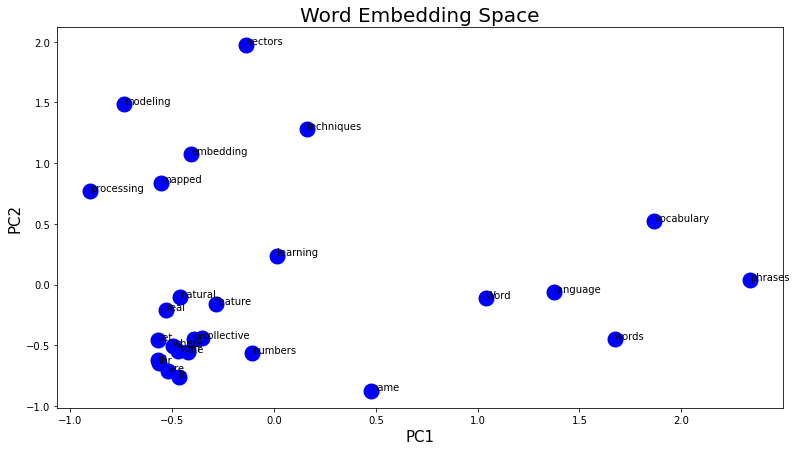

In [21]:
def plot_pca(neww_X, viable_vocab):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(13,7))
    plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
    plt.xlabel("PC1",size=15)
    plt.ylabel("PC2",size=15)
    plt.title("Word Embedding Space",size=20)
    vocab=list(viable_vocab)
    for i, word in enumerate(vocab):
      plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))
plot_pca(neww_X, viable_vocab)

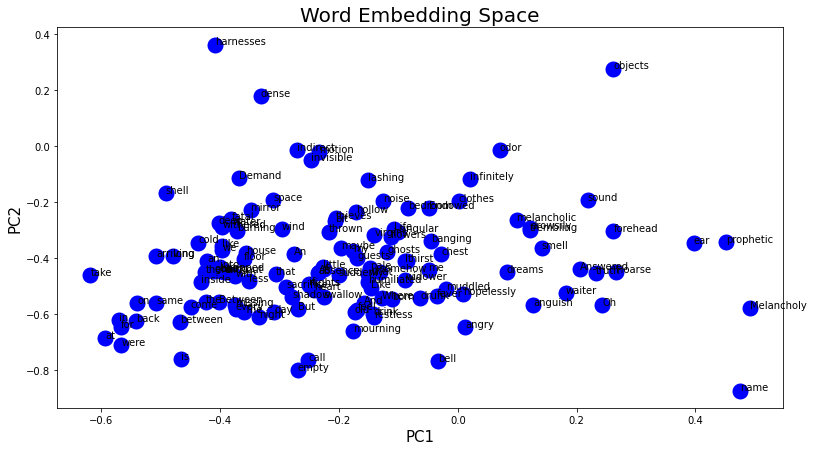

In [22]:
# Generate PCA representations of text we'd like to sonify.
son_viable_vocab = get_tokens(model, son_tokens)
son_values = model[list(son_viable_vocab)]
son_values_pca = pca.transform(son_values)
son_X = son_values_pca[:, :2]
plot_pca(son_X, son_viable_vocab)

# Seems like a pretty poor representation in this example, which is pretty expected since the pca was fit on
# a small & unrelated sample of text

In [23]:
son_dict = {}
for i, word in enumerate(list(son_viable_vocab)): 
    son_dict[word] = son_values_pca[i]

In [24]:
son_dict['shadow']

array([-0.27814507, -0.53840256,  0.03937906,  0.4263203 ,  0.17028792],
      dtype=float32)

In [25]:
sonify_list = []
for word in son_tokens[0]: 
    try: 
        sonify_list.append(son_dict[word])
    except:
        # do we want a filler or just move on to the next word?
        continue
        

In [38]:
import sys

sys.path.append('./modules/')

import matplotlib.pyplot as plt
from importlib import reload
import subprocess as sp
from subprocess import Popen
import os

import notepicker
import writeCmixSco_GRAN_v2 as wRT_gran
import writeCmixSco_WT_ac as wRT_wt
# _ac stands for autocheck

%matplotlib inline

# ======================================================
# autocheck for your RTcmix installation type: 
cmixStatus, cmixResult = sp.getstatusoutput("CMIX")
if cmixStatus == 0:
    cmixInstalled = True
    print("CMIX found.")
else:
    cmixInstalled = False
    print("CMIX not found, using pyGoRTcmix instead.")
# ======================================================

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 10]

CMIX not found, using pyGoRTcmix instead.


In [51]:
n_octaves_total = 5
root_note  = 110.0
ints_per_oct = 12

# chromatic scale of n octaves: 
intervals = np.linspace(0,n_octaves_total,int(n_octaves_total*ints_per_oct))
pitches = root_note*(2**intervals)
print(pitches)

[ 110.          116.65509233  123.71282333  131.19755298  139.13511505
  147.5529063   156.47998098  165.94715117  175.9870931   186.63445995
  197.92600143  209.90069064  222.59985861  236.06733689  250.34960892
  265.49597039  281.55869944  298.59323708  316.65837855  335.81647624
  356.13365492  377.68003996  400.52999938  424.76240053  450.46088229
  477.71414376  506.61625043  537.26695881  569.77206077  604.24374868
  640.80100265  679.57000117  720.68455663  764.28657722  810.52655664
  859.56409363  911.56844277  966.71909868 1025.20641557 1087.23226422
 1153.01072877 1222.76884564 1296.74738713 1375.20169248 1458.40254915
 1546.63712748 1640.20997186 1739.44405187 1844.68187701 1956.2866789
 2074.64366498 2200.16134807 2333.27295633 2474.43792862 2624.14350022
 2782.90638455 2951.27455665 3129.82914448 3319.18643474 3520.        ]


In [52]:
time_line = np.linspace(0,len(sonify_list), len(sonify_list))
times = [] 
for x in time_line: 
    for i in range(num_components):
        times.append(x)

In [65]:
notes = [] 
counter = 0
ranges = []

for i in range(num_components):
    values = [x[i] for x in sonify_list]
    ranges.append((min(values), max(values)))

print(ranges)

for i, x in enumerate(times):
    a = i%num_components
    b = i//num_components
    target = sonify_list[b][a]
    
    target_scaled = (target-ranges[a][0])/(ranges[a][1]-ranges[a][0])
    notes.append(target_scaled*2000)
    
    

[(-0.6181639, 0.49160463), (-0.872924, 0.36374375), (-0.39899173, 0.3328903), (-0.50320095, 0.4533744), (-0.41571775, 0.5881141)]


In [71]:
# (4) write RTcmix Wavetable score
reload(wRT_wt)
base_name = 'test_iter1'
trim = -1
tones_dict = {}
# tones_dict['times'] = np.asarray(times[:trim])
tones_dict['times'] = times
# tones_dict['notes'] = np.asarray(notes[:trim])
# tones_dict['durs'] = np.asarray(durs[:trim]) 

# tones_dict['times'] = np.ones(len(notes[:trim]))
tones_dict['notes'] = notes
tones_dict['durs'] = np.ones(len(times))
tones_dict['amps'] = np.ones(len(times))*2000
tones_dict['pans'] = np.ones(len(times))*0.5

score_name = wRT_wt.writesco(tones_dict,base_name)

test_iter1.sco
CMIX not found; rtoutput() will not be used in score.


In [72]:
dur_sound = max(times)

if cmixInstalled:
    cmix_cmd = 'CMIX < ' + base_name + '.sco'
    print(cmix_cmd)
else:
    dur = str(dur_sound)
    cmix_cmd = os.path.abspath('/Users/calvinlu/Documents/sonification/pyGoRTcmix/Contents/MacOS/pyGoRTcmix') + ' -inputscore ' + os.path.abspath(base_name + '.sco') + ' -output ' + os.path.abspath(base_name + '.wav') + ' -dur ' + dur
    print(cmix_cmd)

# the ! tells the notebook to run a command in the terminal
if sys.platform == 'win32':
    ! dir *.sco
else:
    ! ls *.sco

runCMIX = sp.Popen(cmix_cmd, shell=True) # if can only be called from a shell, use shell=True
# runCMIX.wait()
print("\n" + "hopefully i just wrote your sound file; is it here?" + "\n")
if sys.platform == 'win32':
    ! dir *.wav
else:
    ! ls *.wav

#sp.run(['mv', score_name, '../3_output_nogit'])
#sp.run('mv *.wav ../3_output_nogit/', shell=True)

/Users/calvinlu/Documents/sonification/pyGoRTcmix/Contents/MacOS/pyGoRTcmix -inputscore /Users/calvinlu/Documents/bot/prose2sound/test_iter1.sco -output /Users/calvinlu/Documents/bot/prose2sound/test_iter1.wav -dur 169.0
test_gotRhythm2.sco test_iter1.sco

hopefully i just wrote your sound file; is it here?

test_iter1.wav


In [ ]:
#### 
# https://towardsdatascience.com/visualization-of-word-embedding-vectors-using-gensim-and-pca-8f592a5d3354
# Unsure why anyone is bothering with doing this manually...
####

'''
# Get list of words in vocab
words=list(model.wv.vocab)
#print(words)

# Get vector representations of all words 
X=model[model.wv.vocab]
df=pd.DataFrame(X) # (X?)
df.shape
df.head()

#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)
'''

'\n# Get list of words in vocab\nwords=list(model.wv.vocab)\n#print(words)\n\n# Get vector representations of all words \nX=model[model.wv.vocab]\ndf=pd.DataFrame(X) # (X?)\ndf.shape\ndf.head()\n\n#Computing the correlation matrix\nX_corr=df.corr()\n\n#Computing eigen values and eigen vectors\nvalues,vectors=np.linalg.eig(X_corr)\n\n#Sorting the eigen vectors coresponding to eigen values in descending order\nargs = (-values).argsort()\nvalues = vectors[args]\nvectors = vectors[:, args]\n\n#Taking first 2 components which explain maximum variance for projecting\nnew_vectors=vectors[:,:2]\n\n#Projecting it onto new dimesion with 2 axis\nneww_X=np.dot(X,new_vectors)\n'